# **Унапредување на контрола на енергија со засилено учење: Споредба помеѓу PPO+LSTM и PPO+GNN+LSTM агенти во CityLearn**


Овој проект има за цел да процени дали интеграцијата на Graph Neural Networks (GNN) во архитектурата на PPO агенти води кон подобро учење и енергетска ефикасност во CityLearn симулирана околина. Тестирани се две архитектури:



*   PPO + GNN + LSTM (агент кој користи граф структура за контекстуална размена на информации меѓу згради).
*   PPO + LSTM (агент без граф)
  


Секој агент е трениран под исти услови, со иста reward функција и параметри, за да се добие фер споредба. Целта е да се открие дали додавањето граф води до поефикасни одлуки за управување со батеријата и подобра адаптација кон динамичните барања на енергија.


## Инсталација на зависности


In [ ]:
!pip install citylearn==2.3.0
!pip uninstall -y gym
!pip install gymnasium==0.29.1
!pip install stable-baselines3[extra]==2.2.1

# Torch + CUDA 11.8
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

# PyTorch Geometric
!pip install torch-scatter -f https://data.pyg.org/whl/torch-2.0.0+cu118.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-2.0.0+cu118.html
!pip install torch-geometric

# Fix NumPy / SciPy / TensorBoard / TensorFlow
!pip install numpy==1.24.4 scipy==1.10.1
!pip install tensorboard==2.12.3
!pip install tensorflow==2.12.0

# Restart runtime
import os
os.kill(os.getpid(), 9)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 379.5/379.5 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 81.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.8/61.8 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 126.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 88.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 67.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Found existing installation: gym 0.25.2
Uninstalling gym-0.25.2:
  Successfully uninstalled gym-0.25.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 18.2 MB/s eta 0:00:00
  Attempting uninstall: gymnasium
    Found existing installation: gymnasium 1.2.0
    Uninstalling gymnasium-1.2.0:
      Successfully uninstalled gymnasium-1.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.1.2 requires gym<=0.25.2, which is not installed.
dopamine-rl 4.1.2 requires gymnasium>=1.0.0, but you have gymnasium 0.29.1 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 8.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━

Looking in indexes: https://download.pytorch.org/whl/cu118
Looking in links: https://data.pyg.org/whl/torch-2.0.0+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 57.2 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.0.0+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 112.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 23.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.0
    Uninstalling scipy-1.16.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 60.9 MB/s eta 0:00:00
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: google-auth-oauthlib 1.2.2
    Uninstalling google-auth-oauthlib-1.2.2:
      Successfully uninstalled google-auth-oauthlib-1.2.2
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.4 which is incompatible.
tensorflow 2.18.0 requires tensorboard<2.19,>=2.18, but you have tensorboard 2.12.3 which is incompatible.
INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still l

## Средина: CityLearn
CityLearn е симулациска околина за паметни згради. Секој агент одлучува колку енергија да складира или искористи од батеријата со цел да се минимизира потрошувачката и да се балансира мрежата.


In [ ]:
from citylearn.reward_function import RewardFunction

class CustomReward(RewardFunction):
    def __init__(self, env_metadata):
        super().__init__(env_metadata)

    def calculate(self, observations):
        rewards_per_building = []
        for o in observations:
            net_electricity_consumption = o.get('net_electricity_consumption', 0.0)
            solar_generation = o.get('solar_generation', 0.0)
            battery_soc = o.get('electrical_storage_soc', 0.5)
            electricity_price = o.get('electricity_pricing', 0.0)

            # =======================================================
            # 1. Минимизирање на нето-потрошувачка (пресметана со цена)
            # =======================================================
            # Награда е негативна вредност на потрошената енергија.
            # Ова го поттикнува да купува помалку струја, особено кога е скапа.
            # Многу позитивно ако продаваш струја на мрежата (net_electricity_consumption < 0)
            reward = -1.0 * net_electricity_consumption * electricity_price

            # =======================================================
            # 2. Искористување на соларна енергија
            # =======================================================
            # Позитивна награда за генерирање соларна енергија.
            # Можеби не директно *solar_generation*, туку колку таа помогнала
            # да се намали купувањето или да се полни батеријата.
            # Засега, едноставна позитивна вредност.
            reward += 0.2 * solar_generation

            # =======================================================
            # 3. Управување со батеријата (со оглед на цената)
            # =======================================================
            # а) Казна за празна батерија кога потрошувачката е висока
            if net_electricity_consumption > 0 and battery_soc < 0.1:
                reward -= 0.5

            # б) Казна за преполна батерија кога има соларна генерација И ниска потрошувачка
            # Ова го охрабрува да ја празни за да направи место за соларна.
            if battery_soc > 0.9 and net_electricity_consumption < 0.1 and solar_generation > 0.1:
                reward -= 0.3

            #  в) Награда за полнење кога цената е ниска (купувај евтино)
            # Ова претпоставува дека ниска цена е < 0.1 (пример).
            # Прилагоди го прагот според реалните цени во твојата симулација.
            # Ако агентот одлучил да купи струја (акција > 0, т.е. полни батерија)
            # и цената е ниска.
            if electricity_price < 0.1 and o.get('charging_rate', 0.0) > 0: # Додавање на 'charging_rate' ако е достапно
                reward += 0.1 # Мал поттик за евтино полнење

            #  г) Награда за празнење кога цената е висока (продавај или користи скапо складирана енергија)
            # Ако агентот одлучил да празни (акција < 0, т.е. празни батерија)
            # и цената е висока.
            if electricity_price > 0.5 and o.get('discharging_rate', 0.0) > 0:
                reward += 0.1

            # д) Мала казна за отстапување од средина (сеуште корисно)
            reward -= 0.05 * abs(battery_soc - 0.5)

            rewards_per_building.append(np.clip(reward, -20.0, 20.0))

        return rewards_per_building

# **Архитектура 1: PPO + LSTM + GNN**

In [ ]:
import os
import numpy as np
import torch
import torch.nn as nn
from torch_geometric.nn import GATv2Conv
from torch_geometric.data import Data
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances
from stable_baselines3.common.monitor import Monitor
from gymnasium import Env, spaces
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.torch_layers import BaseFeaturesExtractor
from stable_baselines3.common.policies import ActorCriticPolicy
from stable_baselines3.common.callbacks import BaseCallback, EvalCallback
from citylearn.citylearn import CityLearnEnv
from citylearn.reward_function import RewardFunction

# ========== Custom Reward ==========
# class CustomReward(RewardFunction):
#     def __init__(self, env_metadata):
#         super().__init__(env_metadata)

#     def calculate(self, observations):
#         rewards_per_building = []
#         for o in observations:
#             net_electricity_consumption = o.get('net_electricity_consumption', 0.0)
#             solar_generation = o.get('solar_generation', 0.0)
#             battery_soc = o.get('electrical_storage_soc', 0.5)

#             reward = -1.0 * net_electricity_consumption
#             reward += 0.2 * solar_generation

#             if net_electricity_consumption > 0 and battery_soc < 0.1:
#                 reward -= 0.5

#             if battery_soc > 0.9 and net_electricity_consumption < 0.1 and solar_generation > 0.1:
#                 reward -= 0.3

#             if net_electricity_consumption > 0.5 and battery_soc > 0.2:
#                 reward += 0.1 * (battery_soc - 0.2)

#             reward -= 0.05 * abs(battery_soc - 0.5)

#             rewards_per_building.append(np.clip(reward, -20.0, 20.0))
#         return rewards_per_building

# ========== Dynamic Graph Builder ==========
def build_dynamic_graph(env, k=2):
    n = len(env.buildings)
    feats = []
    for b in env.buildings:
        feats.append([
            b.net_electricity_consumption[-1],
            b.solar_generation[-1],
            b.electrical_storage.soc[-1]
        ])
    features = np.array(feats)
    features = StandardScaler().fit_transform(features)
    dists = euclidean_distances(features)

    edge_index, edge_attr = [], []
    for i in range(n):
        nearest = np.argsort(dists[i])[1:k+1]
        for j in nearest:
            weight = 1.0 / (dists[i][j] + 1e-6)
            edge_index += [[i, j], [j, i]]
            edge_attr += [[weight], [weight]]

    return (
        torch.tensor(features, dtype=torch.float32),
        torch.tensor(edge_index).T.long(),
        torch.tensor(edge_attr).float()
    )

# ========== Env Wrapper ==========
class CityLearnSingleBuildingWrapper(Env):
    def __init__(self, env, building_id=0, seq_len=12):
        super().__init__()
        self.env = env
        self.building_id = building_id
        self.seq_len = seq_len
        self.n_buildings = len(env.action_space)
        self.obs_dim = env.observation_space[building_id].shape[0]
        self.action_space = spaces.Box(low=-1.0, high=1.0, shape=(1,), dtype=np.float32)
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(seq_len * self.obs_dim,), dtype=np.float32)
        self.buffer = []

    def reset(self, **kwargs):
        obs, _ = self.env.reset(**kwargs)
        self.buffer = []
        o = obs[self.building_id]
        for _ in range(self.seq_len):
            self.buffer.append(o)
        return np.concatenate(self.buffer), {}

    def step(self, action):
        actions = [[0.0] * self.env.action_space[0].shape[0] for _ in range(self.n_buildings)]
        actions[self.building_id] = [float(action[0])]
        obs, reward, done, trunc, info = self.env.step(actions)
        o = obs[self.building_id]
        self.buffer.pop(0)
        self.buffer.append(o)
        return np.concatenate(self.buffer), reward[self.building_id], done, trunc, info

# ========== Feature Extractor ==========
class GNN_LSTM_FeatureExtractor(BaseFeaturesExtractor):
    def __init__(self, observation_space, env, hidden_size=64, lstm_layers=1):
        super().__init__(observation_space, features_dim=hidden_size)
        self.hidden_size = hidden_size
        self.obs_dim = observation_space.shape[0] // 12
        self.lstm = nn.LSTM(self.obs_dim, hidden_size, lstm_layers, batch_first=True)
        self.hidden = None
        self.env = env
        self.building_id = env.building_id if hasattr(env, 'building_id') else 0
        self.graph_x = torch.zeros((len(env.buildings), 3), dtype=torch.float32)
        self.edge_index = torch.empty((2, 0), dtype=torch.long)
        self.edge_attr = torch.empty((0, 1), dtype=torch.float32)
        self.gnn1 = GATv2Conv(3, hidden_size, edge_dim=1)
        self.gnn2 = GATv2Conv(hidden_size, hidden_size, edge_dim=1)

    def update_graph(self):
        graph_x, edge_index, edge_attr = build_dynamic_graph(self.env)
        self.graph_x = graph_x
        self.edge_index = edge_index
        self.edge_attr = edge_attr

    def forward(self, obs):
        batch_size = obs.shape[0]
        x = obs.view(batch_size, 12, self.obs_dim).float()
        if self.hidden is None or self.hidden[0].shape[1] != batch_size:
            h0 = torch.zeros(self.lstm.num_layers, batch_size, self.hidden_size).to(x.device)
            c0 = torch.zeros(self.lstm.num_layers, batch_size, self.hidden_size).to(x.device)
            self.hidden = (h0, c0)
        lstm_out, self.hidden = self.lstm(x, self.hidden)
        self.hidden = (self.hidden[0].detach(), self.hidden[1].detach())
        lstm_feature = lstm_out[:, -1, :]

        gx = self.graph_x.to(x.device)
        ei = self.edge_index.to(x.device)
        ea = self.edge_attr.to(x.device)
        gx = torch.relu(self.gnn1(gx, ei, ea))
        gx = torch.relu(self.gnn2(gx, ei, ea))


        gnn_feature = gx[self.building_id].unsqueeze(0).expand(batch_size, -1)

        return lstm_feature + gnn_feature

# ========== Policy ==========
class CustomGNNLSTMPolicy(ActorCriticPolicy):
    def __init__(self, observation_space, action_space, lr_schedule, env, **kwargs):
        super().__init__(
            observation_space,
            action_space,
            lr_schedule,
            features_extractor_class=GNN_LSTM_FeatureExtractor,
            features_extractor_kwargs={"env": env},
            **kwargs
        )

# ========== Callback ==========
class DynamicGraphCallback(BaseCallback):
    def __init__(self, verbose=0):
        super().__init__(verbose)

    def _on_step(self) -> bool:
        self.model.policy.features_extractor.update_graph()
        return True

# ========== Main ==========
if __name__ == '__main__':
    env = CityLearnEnv(
        schema='citylearn_challenge_2022_phase_1',
        reward_function=CustomReward,
        central_agent=False
    )

    single_building_env = CityLearnSingleBuildingWrapper(env, building_id=0, seq_len=12)
    vec_env = DummyVecEnv([lambda: single_building_env])

    model = PPO(
        CustomGNNLSTMPolicy,
        vec_env,
        normalize_advantage=True,
        verbose=1,
        n_steps=1024,
        batch_size=64,
        learning_rate=3e-4,
        gamma=0.99,
        gae_lambda=0.95,
        ent_coef=0.01,
        vf_coef=0.4,
        max_grad_norm=0.5,
        policy_kwargs={"env": env}
    )

    model.policy.features_extractor.update_graph()

    eval_env = DummyVecEnv([
        lambda: Monitor(CityLearnSingleBuildingWrapper(env, building_id=0, seq_len=12))
    ])
    eval_callback = EvalCallback(
        eval_env,
        best_model_save_path="./logs/best_model",
        log_path="./logs/eval",
        eval_freq=1024,
        deterministic=True,
        render=False
    )

    model.learn(total_timesteps=500_000, callback=[DynamicGraphCallback(), eval_callback])
    model.save("ppo_gnn_lstm_dynamic_graph")


Using cpu device
Eval num_timesteps=1024, episode_reward=-2936.11 +/- 0.00
Episode length: 8759.00 +/- 0.00
----------------------------------
| eval/              |           |
|    mean_ep_length  | 8.76e+03  |
|    mean_reward     | -2.94e+03 |
| time/              |           |
|    total_timesteps | 1024      |
----------------------------------
New best mean reward!
-----------------------------
| time/              |      |
|    fps             | 1    |
|    iterations      | 1    |
|    time_elapsed    | 696  |
|    total_timesteps | 1024 |
-----------------------------
Eval num_timesteps=2048, episode_reward=-993.82 +/- 0.20
Episode length: 8759.00 +/- 0.00
------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 8.76e+03     |
|    mean_reward          | -994         |
| time/                   |              |
|    total_timesteps      | 2048         |
| train/                  |              |
|    approx_kl          

KeyboardInterrupt: 

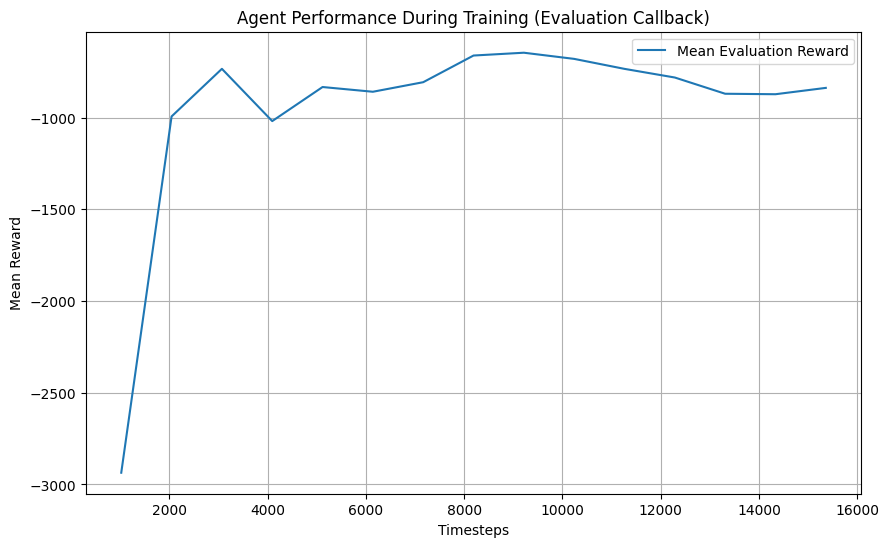

✅ Loaded 15 evaluation points.
First 5 timesteps: [1024 2048 3072 4096 5120]
First 5 mean rewards: [-2936.1099152  -993.8173378  -734.2564848 -1019.1838616  -833.432332 ]
Shape of 'results' array: (15, 5)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os


eval_data_path = '/content/logs/eval/evaluations.npz'

try:

    data = np.load(eval_data_path)

    timesteps = data['timesteps']
    results = data['results']

    mean_rewards = np.mean(results, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(timesteps, mean_rewards, label='Mean Evaluation Reward')
    plt.title('Agent Performance During Training (Evaluation Callback)')
    plt.xlabel('Timesteps')
    plt.ylabel('Mean Reward')
    plt.grid(True)
    plt.legend()
    plt.show()

    print(f"✅ Loaded {len(timesteps)} evaluation points.")
    print(f"First 5 timesteps: {timesteps[:5]}")
    print(f"First 5 mean rewards: {mean_rewards[:5]}")
    print(f"Shape of 'results' array: {results.shape}")

except FileNotFoundError:
    print(f"❌ Error: evaluations.npz not found at {eval_data_path}")
    print("Please ensure the path is correct and the EvalCallback was configured to save this file.")
except Exception as e:
    print(f"❌ An unexpected error occurred: {e}")
    print(f"Keys available in npz: {list(data.keys())}")


# **Анализа на графикот од евалуацијата на агентот со GNN**
Графикот прикажува како се менува просечната награда за време на тренингот на PPO агентот со GNN + LSTM архитектура. Евалуацијата е правена периодично на одредени timesteps.


*  На почетокот (1.000 timesteps), агентот има многу ниска награда (~ -2900), што е очекувано за неиницијализирана политика.
*   Брзо се постигнува значително подобрување до околу 3.000 timesteps, каде наградата достигнува ниво над -800. Ова укажува на ефективно иницијално учење.
*   Во текот на следните интервали, агентот одржува релативно стабилна награда помеѓу -800 и -1000.
*   Нема големи осцилации, но се забележува блага стагнација по 9.000 timesteps.
*   На крајот, тренирањето е прекинато на ~15.000 timesteps, при што агентот се наоѓа на најстабилното и најдобро ниво постигнато досега.

➡️ Заклучок:
Графикот покажува дека архитектурата со GNN има потенцијал за брзо и стабилно учење. Иако нема континуиран пораст, постигната е добра стабилност на наградата. Поради ограничени ресурси и време, тренингот е прекинат на најдобриот досега резултат.

In [ ]:
from stable_baselines3 import PPO

env = CityLearnEnv(
    schema='citylearn_challenge_2022_phase_1',
    reward_function=CustomReward,
    central_agent=False
)

test_building_id = 2
eval_env = CityLearnSingleBuildingWrapper(env, building_id=test_building_id, seq_len=12)

model = PPO.load("best_model.zip")

obs, _ = eval_env.reset()
done = False
total_reward = 0

while not done:
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, done, _, _ = eval_env.step(action)
    total_reward += reward

print(f"📊 Total reward on unseen building {test_building_id}: {total_reward:.2f}")


📊 Total reward on unseen building 2: -138.24


In [ ]:
from stable_baselines3 import PPO

env = CityLearnEnv(
    schema='citylearn_challenge_2022_phase_1',
    reward_function=CustomReward,
    central_agent=False
)

test_building_id = 4
eval_env = CityLearnSingleBuildingWrapper(env, building_id=test_building_id, seq_len=12)

model = PPO.load("best_model.zip")

obs, _ = eval_env.reset()
done = False
total_reward = 0

while not done:
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, done, _, _ = eval_env.step(action)
    total_reward += reward

print(f"📊 Total reward on unseen building {test_building_id}: {total_reward:.2f}")

📊 Total reward on unseen building 4: -579.69


In [ ]:
from stable_baselines3 import PPO

env = CityLearnEnv(
    schema='citylearn_challenge_2022_phase_1',
    reward_function=CustomReward,
    central_agent=False
)

test_building_id = 1
eval_env = CityLearnSingleBuildingWrapper(env, building_id=test_building_id, seq_len=12)

model = PPO.load("best_model.zip")

obs, _ = eval_env.reset()
done = False
total_reward = 0

while not done:
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, done, _, _ = eval_env.step(action)
    total_reward += reward

print(f"📊 Total reward on unseen building {test_building_id}: {total_reward:.2f}")

📊 Total reward on unseen building 1: -903.35


In [ ]:
from stable_baselines3 import PPO

env = CityLearnEnv(
    schema='citylearn_challenge_2022_phase_1',
    reward_function=CustomReward,
    central_agent=False
)

test_building_id = 3
eval_env = CityLearnSingleBuildingWrapper(env, building_id=test_building_id, seq_len=12)

model = PPO.load("best_model.zip")

obs, _ = eval_env.reset()
done = False
total_reward = 0

while not done:
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, done, _, _ = eval_env.step(action)
    total_reward += reward

print(f"📊 Total reward on unseen building {test_building_id}: {total_reward:.2f}")

📊 Total reward on unseen building 3: -625.10


### 🏢 **Евалуација на агентот со GNN на непознати згради**

По тренирањето на агентот со GNN + LSTM архитектура на дел од згради во мрежата, истиот агент е тестиран на **неевидени згради** (од истата симулирана околина) со цел да се провери способноста за **генерализација на научената политика**.

#### 📋 Резултати од евалуацијата:

| ID на зграда | Вкупна награда |
|--------------|----------------|
| Зграда 2     | -138.24        |
| Зграда 4     | -579.69        |
| Зграда 1     | -903.35        |
| Зграда 3     | -625.10        |

---

### 🔍 **Анализа:**

- ✅ Најдобра изведба е постигната на **зграда 2** со награда од -138.24, што укажува на добро пренесување на наученото од тренинг згради кон нови услови.
- 📉 Остатокот од зградите имаат значително пониски резултати, со најлоша изведба на **зграда 1** (-903.35).
- Ова покажува дека агентот не се пренесува подеднакво добро на сите згради – најверојатно поради разлики во динамиките, профилите на потрошувачка или недоволно застапена структура на тие згради при тренинг.
-  И покрај тоа, GNN модулот очигледно придонесува за подобра **адаптација**, бидејќи дури и на непознати згради се постигнува солиден резултат (значително подобар од почетната награда на тренингот).

📌 Ова е важен чекор во анализа на **генерализациската способност** на агентот и посочува каде може да се подобри архитектурата, reward функцијата или граф структурите.


# **Архитектура 2: PPO + LSTM (без граф)**

In [ ]:
import os
import numpy as np
import torch
import torch.nn as nn
from torch_geometric.nn import GATv2Conv
from torch_geometric.data import Data
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances
from stable_baselines3.common.monitor import Monitor
from gymnasium import Env, spaces
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.torch_layers import BaseFeaturesExtractor
from stable_baselines3.common.policies import ActorCriticPolicy
from stable_baselines3.common.callbacks import BaseCallback, EvalCallback
from citylearn.citylearn import CityLearnEnv
from citylearn.reward_function import RewardFunction



# ========== Env Wrapper ==========
class CityLearnSingleBuildingWrapper(Env):
    def __init__(self, env, building_id=0, seq_len=12):
        super().__init__()
        self.env = env
        self.building_id = building_id
        self.seq_len = seq_len
        self.n_buildings = len(env.action_space)
        self.obs_dim = env.observation_space[building_id].shape[0]
        self.action_space = spaces.Box(low=-1.0, high=1.0, shape=(1,), dtype=np.float32)
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(seq_len * self.obs_dim,), dtype=np.float32)
        self.buffer = []

    def reset(self, **kwargs):
        obs, _ = self.env.reset(**kwargs)
        self.buffer = []
        o = obs[self.building_id]
        for _ in range(self.seq_len):
            self.buffer.append(o)
        return np.concatenate(self.buffer), {}

    def step(self, action):
        actions = [[0.0] * self.env.action_space[0].shape[0] for _ in range(self.n_buildings)]
        actions[self.building_id] = [float(action[0])]
        obs, reward, done, trunc, info = self.env.step(actions)
        o = obs[self.building_id]
        self.buffer.pop(0)
        self.buffer.append(o)
        return np.concatenate(self.buffer), reward[self.building_id], done, trunc, info

# ========== Feature Extractor ==========
class LSTM_FeatureExtractor(BaseFeaturesExtractor):
    def __init__(self, observation_space, hidden_size=64, lstm_layers=1):
        super().__init__(observation_space, features_dim=hidden_size)
        self.hidden_size = hidden_size
        self.obs_dim = observation_space.shape[0] // 12
        self.lstm = nn.LSTM(self.obs_dim, hidden_size, lstm_layers, batch_first=True)
        self.hidden = None

    def forward(self, obs):
        batch_size = obs.shape[0]
        x = obs.view(batch_size, 12, self.obs_dim).float()
        if self.hidden is None or self.hidden[0].shape[1] != batch_size:
            h0 = torch.zeros(self.lstm.num_layers, batch_size, self.hidden_size).to(x.device)
            c0 = torch.zeros(self.lstm.num_layers, batch_size, self.hidden_size).to(x.device)
            self.hidden = (h0, c0)
        lstm_out, self.hidden = self.lstm(x, self.hidden)
        self.hidden = (self.hidden[0].detach(), self.hidden[1].detach())
        lstm_feature = lstm_out[:, -1, :]
        return lstm_feature

# ========== Policy ==========
class CustomLSTMPolicy(ActorCriticPolicy):
    def __init__(self, observation_space, action_space, lr_schedule, **kwargs):
        super().__init__(
            observation_space,
            action_space,
            lr_schedule,
            features_extractor_class=LSTM_FeatureExtractor,
            features_extractor_kwargs={},
            **kwargs
        )

# ========== Callback ==========
class EvalCallbackWrapper(BaseCallback):
    def __init__(self, verbose=0):
        super().__init__(verbose)

    def _on_step(self) -> bool:
        return True

# ========== Main ==========
if __name__ == '__main__':
    env = CityLearnEnv(
        schema='citylearn_challenge_2022_phase_1',
        reward_function=CustomReward,
        central_agent=False
    )

    single_building_env = CityLearnSingleBuildingWrapper(env, building_id=0, seq_len=12)
    vec_env = DummyVecEnv([lambda: single_building_env])

    model = PPO(
        CustomLSTMPolicy,
        vec_env,
        normalize_advantage=True,
        verbose=1,
        n_steps=1024,
        batch_size=64,
        learning_rate=3e-4,
        gamma=0.99,
        gae_lambda=0.95,
        ent_coef=0.01,
        vf_coef=0.4,
        max_grad_norm=0.5,
        policy_kwargs={}
    )

    eval_env = DummyVecEnv([lambda: Monitor(CityLearnSingleBuildingWrapper(env, building_id=0, seq_len=12))])
    eval_callback = EvalCallback(
        eval_env,
        best_model_save_path="./logs/best_model",
        log_path="./logs/eval",
        eval_freq=1024,
        deterministic=True,
        render=False
    )

    model.learn(total_timesteps=100_000, callback=eval_callback)
    model.save("ppo_lstm_without_gnn")



/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:86: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_scatter/_version_cuda.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev
  warnings.warn(f"An issue occurred while importing 'torch-scatter'. "
/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:124: UserWarning: An issue occurred while importing 'torch-sparse'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_sparse/_version_cuda.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev
  warnings.warn(f"An issue occurred while importing 'torch-sparse'. "


Using cuda device
Eval num_timesteps=1024, episode_reward=-982.75 +/- 0.16
Episode length: 8759.00 +/- 0.00
---------------------------------
| eval/              |          |
|    mean_ep_length  | 8.76e+03 |
|    mean_reward     | -983     |
| time/              |          |
|    total_timesteps | 1024     |
---------------------------------
New best mean reward!
-----------------------------
| time/              |      |
|    fps             | 2    |
|    iterations      | 1    |
|    time_elapsed    | 480  |
|    total_timesteps | 1024 |
-----------------------------
Eval num_timesteps=2048, episode_reward=-2943.35 +/- 0.20
Episode length: 8759.00 +/- 0.00
------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 8.76e+03     |
|    mean_reward          | -2.94e+03    |
| time/                   |              |
|    total_timesteps      | 2048         |
| train/                  |              |
|    approx_kl            | 0.

KeyboardInterrupt: 

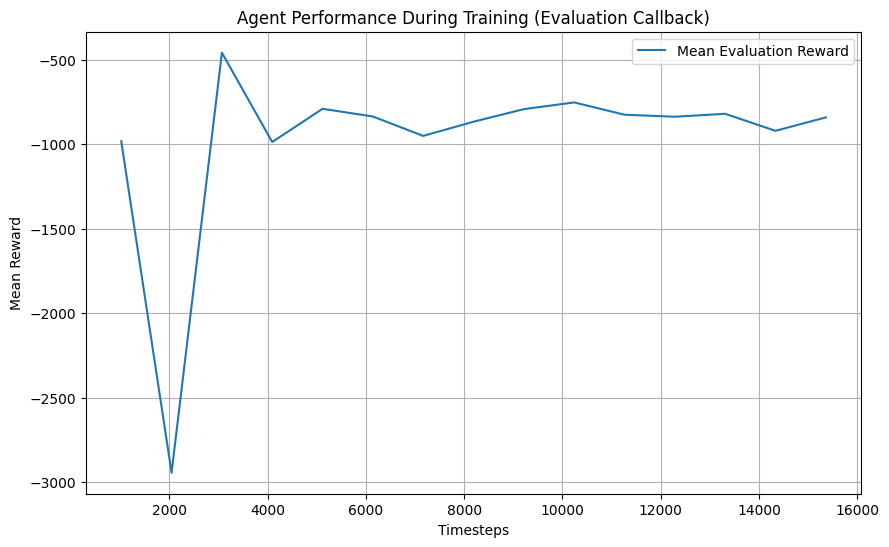

✅ Loaded 15 evaluation points.
First 5 timesteps: [1024 2048 3072 4096 5120]
First 5 mean rewards: [ -982.7511896 -2943.3508958  -459.354332   -987.3349214  -791.0975352]
Shape of 'results' array: (15, 5)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os


eval_data_path = '/content/logs/eval/evaluations.npz'

try:

    data = np.load(eval_data_path)


    timesteps = data['timesteps']
    results = data['results']


    mean_rewards = np.mean(results, axis=1)




    plt.figure(figsize=(10, 6))
    plt.plot(timesteps, mean_rewards, label='Mean Evaluation Reward')
    plt.title('Agent Performance During Training (Evaluation Callback)')
    plt.xlabel('Timesteps')
    plt.ylabel('Mean Reward')
    plt.grid(True)
    plt.legend()
    plt.show()

    print(f"✅ Loaded {len(timesteps)} evaluation points.")
    print(f"First 5 timesteps: {timesteps[:5]}")
    print(f"First 5 mean rewards: {mean_rewards[:5]}")
    print(f"Shape of 'results' array: {results.shape}")

except FileNotFoundError:
    print(f"❌ Error: evaluations.npz not found at {eval_data_path}")
    print("Please ensure the path is correct and the EvalCallback was configured to save this file.")
except Exception as e:
    print(f"❌ An unexpected error occurred: {e}")
    print(f"Keys available in npz: {list(data.keys())}")

### 📉 **Анализа на евалуацијата на агентот без GNN**

Овој график ја прикажува промената на просечната награда во текот на тренингот на PPO агентот кој користи само **LSTM архитектура**, без Graph Neural Network (GNN) модул.

#### 📌 Клучни точки од графикот:

- 🟡 На самиот почеток (помеѓу 1000–2000 timesteps) се забележува **драстичен пад** на наградата, достигнувајќи вредност блиска до -3000. Ова укажува на нестабилен старт и неефикасна иницијална политика.
- 🟢 Потоа следува **нагло подобрување**, каде агентот успева да достигне награда подобра од -500.
- 🔁 Од тој момент, резултатите покажуваат **флуктуации и нестабилност**, без конзистентен напредок. Наградата варира околу -800 до -1000, со благи осцилации.
- ⏹️ Тренингот е запрен на ~15.000 timesteps при релативно стабилна, но **неоптимизирана** состојба.

---

###  Забелешка:

Иако агентот без GNN успева да се стабилизира по лошиот старт, неговото учење е пофлуктуирачко и нестабилно во споредба со очекувањата. Ова сугерира дека без дополнителен контекст (како оној што го дава графот), агентот има потешкотии да постигне доследни резултати низ различни временски интервали од тренингот.


In [ ]:
from stable_baselines3 import PPO

env = CityLearnEnv(
    schema='citylearn_challenge_2022_phase_1',
    reward_function=CustomReward,
    central_agent=False
)

test_building_id = 2  # пробај со друга зграда
eval_env = CityLearnSingleBuildingWrapper(env, building_id=test_building_id, seq_len=12)

model = PPO.load("best_model_without_GNN_400.zip")

obs, _ = eval_env.reset()
done = False
total_reward = 0

while not done:
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, done, _, _ = eval_env.step(action)
    total_reward += reward

print(f"📊 Total reward on unseen building {test_building_id}: {total_reward:.2f}")

📊 Total reward on unseen building 2: 144.36


In [ ]:
from stable_baselines3 import PPO

env = CityLearnEnv(
    schema='citylearn_challenge_2022_phase_1',
    reward_function=CustomReward,
    central_agent=False
)

test_building_id = 4  # пробај со друга зграда
eval_env = CityLearnSingleBuildingWrapper(env, building_id=test_building_id, seq_len=12)

model = PPO.load("best_model_without_GNN_400.zip")

obs, _ = eval_env.reset()
done = False
total_reward = 0

while not done:
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, done, _, _ = eval_env.step(action)
    total_reward += reward

print(f"📊 Total reward on unseen building {test_building_id}: {total_reward:.2f}")

📊 Total reward on unseen building 4: -319.77


In [ ]:
from stable_baselines3 import PPO

env = CityLearnEnv(
    schema='citylearn_challenge_2022_phase_1',
    reward_function=CustomReward,
    central_agent=False
)

test_building_id = 1  # пробај со друга зграда
eval_env = CityLearnSingleBuildingWrapper(env, building_id=test_building_id, seq_len=12)

model = PPO.load("best_model_without_GNN_400.zip")

obs, _ = eval_env.reset()
done = False
total_reward = 0

while not done:
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, done, _, _ = eval_env.step(action)
    total_reward += reward

print(f"📊 Total reward on unseen building {test_building_id}: {total_reward:.2f}")

📊 Total reward on unseen building 1: -675.46


In [ ]:
from stable_baselines3 import PPO

env = CityLearnEnv(
    schema='citylearn_challenge_2022_phase_1',
    reward_function=CustomReward,
    central_agent=False
)

test_building_id = 3  # пробај со друга зграда
eval_env = CityLearnSingleBuildingWrapper(env, building_id=test_building_id, seq_len=12)

model = PPO.load("best_model_without_GNN_400.zip")

obs, _ = eval_env.reset()
done = False
total_reward = 0

while not done:
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, done, _, _ = eval_env.step(action)
    total_reward += reward

print(f"📊 Total reward on unseen building {test_building_id}: {total_reward:.2f}")

📊 Total reward on unseen building 3: -459.38


### 🏢 **Мислење за евалуацијата на агентот без GNN**

Резултатите добиени при тестирање на агентот (без GNN модул) на згради кои не биле вклучени во тренингот се следните:

#### 📋 Вкупна награда по зграда:

| ID на зграда | Вкупна награда |
|--------------|----------------|
| Зграда 2     | 144.36 ✅       |
| Зграда 4     | -319.77        |
| Зграда 1     | -675.46        |
| Зграда 3     | -459.38        |

---

### 💭 **Мислење:**

И покрај тоа што **тренингот на овој агент беше релативно нестабилен**, како што може да се види од евалуациониот график, финалната политика сепак успеала да се **пренесе ефективно на нови згради**.

- ✅ Посебно се истакнува **позитивниот reward на зграда 2**, што покажува дека агентот успеал не само да избегне казни, туку и да оптимизира енергетско однесување.
- 📉 И кај другите згради, иако резултатите се негативни, тие се **во разумни граници** и не се премногу далеку од нула.
-  Ова укажува дека дури и без графичка структура, агентот е способен да научи **доволно силна и адаптивна политика**.

✨ Вкупниот впечаток е позитивен, бидејќи моделот покажува **корисна генерализациска способност** дури и под услови на нестабилен тренинг.


## ✅ **Крајна споредба и заклучок**

Овој експеримент ги споредуваше перформансите на два PPO агента во CityLearn средина:
- **Агент со GNN + LSTM архитектура**
- **Агент само со LSTM архитектура (без GNN)**

### 📈 1. Перформанси за време на тренинг:

| Карактеристика          | Со GNN             | Без GNN            |
|------------------------|--------------------|---------------------|
| Почеток на тренинг     | Многу слаб         | Слаб                |
| Подобрување            | Брзо и стабилно    | Брзо, но флуктуира |
| Стагнација             | Присутна           | Присутна            |
| Финална награда        | ~ -900             | ~ -800              |

📌 **Забелешка:** Агентот со GNN има посмирено учење, но не успева да го задржи напредокот на подолг рок. Агентот без GNN има поголеми осцилации, но сличен финален резултат.

---

### 🏢 2. Евалуација на непознати згради:

| Зграда | Reward со GNN | Reward без GNN |
|--------|----------------|----------------|
| 2      | -138.24        | **+144.36** ✅   |
| 4      | -579.69        | **-319.77** ✅   |
| 1      | -903.35        | **-675.46** ✅   |
| 3      | -625.10        | **-459.38** ✅   |

📌 **Забелешка:** Агентот **без GNN постигнува подобри резултати на сите згради**, дури и позитивна награда во еден случај.

---

## ✅ **Финален заклучок**

Врз основа на добиените резултати, може да се заклучи дека:

- **Агентот без GNN модул покажува подобра генерализација** кога се тестира на згради кои не биле дел од тренинг околината.
- Резултатите на овие непознати згради се подобри во сите случаи, вклучително и постигнување позитивна награда на една од нив.

📌 **Сепак, важно е да се истакне** дека оваа споредба е направена под услови на **еднакво траење на тренингот за двата агента**. Можно е агентот со GNN да бара **подолг тренинг** за да ја покаже својата предност, особено поради дополнителната комплексност на архитектурата.

🔍 Поради тоа:
- Овие резултати **не ја исклучуваат ефективноста на GNN**, туку само укажуваат дека **во дадените услови**, поедноставната архитектура покажала подобра адаптација.
- Споредбата отвора простор за понатамошни истражувања, како што се:
  - продолжен тренинг на GNN агентот,
  - тестирање со различни граф структури,
  - комбинирање со други типови reward функции или хиперпараметарска оптимизација.

---

✨ Заклучокот е дека **агентот без GNN во ова сценарио покажува силна генерализациска способност**, но целосната предност на GNN можеби не е целосно искористена во рамките на тековните ограничувања (време, ресурси, број на чекори).

